In [1]:
## Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import matplotlib as mpl

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "KYYnXWX4dqIIa4manxh7SrWiE" 
consumer_secret = "gYt1IOexYIM2zQ5JyP5LZ8j4LCxJo0JmmRhxumYK9c66fkkjTd"
access_token = "876868686-0SZofwxN43Pu6GqpeRVnlBb6v0RAfUB3yvwEZNNE"
access_token_secret = "O5DD4tdLJVASspR5juawaZwAdJ8UssAolMdZYVO8zemXc"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
## Target News Accounts
target_users = ["@BBCNews", "@CBS", "@CNN", "@FoxNews","@nytimes"]

# List to hold Target News sentiments results
results_list = []

# Loop through all target News Accounts on Twitter
for target_user in target_users:
    
    # Variables for holding sentiments for target News Accounts
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    # Variable for max_id
    oldest_tweet = None

    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(target_user, max_id = oldest_tweet, page=x)
        
        # Loop through all tweets 
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            
            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)

            # Get Tweet ID, subtract 1, and assign to oldest_tweet
            oldest_tweet = tweet['id'] - 1

    
            # Store the Average Sentiments for all target News Accounts
            sentiment = {"User": target_user,
                "Compound": np.mean(compound_list),
                "Positive": np.mean(positive_list),
                "Neutral": np.mean(negative_list),
                "Negative": np.mean(neutral_list),
                "Tweet Count": len(compound_list)}


    # Append target News results to 'results_list'
    results_list.append(sentiment)

In [3]:
# Convert target News sentiments to DataFrame
sentiments_pd = pd.DataFrame(results_list).round(3)
sentiments_pd.head()
sentiments_pd.to_csv('sentimentsNews_summary.csv', index=False)

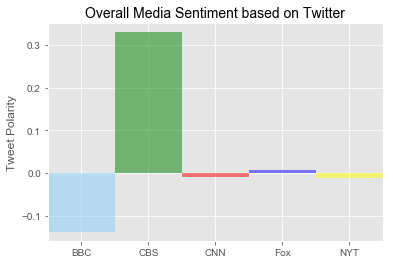

In [ ]:
## Overall Media Sentiment based on Twitter Bar Graph

# create color list
bars_color = ['lightskyblue', 'green', 'red', 'blue', 'yellow']

# Create bar chart
bars = plt.bar(sentiments_pd["User"], sentiments_pd["Compound"], label = sentiments_pd["Compound"], 
               color= bars_color, alpha=0.5, align="edge", width=1.0)

# Adding the required limit, style, title, legend, and text
plt.xlim(0, len(sentiments_pd["User"]))
plt.ylim(min(sentiments_pd["Compound"] - 0.02), max(sentiments_pd["Compound"] + 0.02))
plt.title("Overall Media Sentiment based on Twitter" , fontsize= 14)
plt.xticks([0.5,1.5,2.5,3.5,4.5],['BBC', 'CBS', 'CNN', 'Fox', 'NYT'])

plt.ylabel("Tweet Polarity")
mpl.style.use("seaborn")
plt.savefig("BarChart.png")

#display the final plot
plt.show()

In [ ]:
## Collect the required Data for Sentiment Analysis of Media Tweets Plot

# Variables for holding sentiments
sentiments2 = []

# Loop through all target News Accounts on Twitter
for target_user in target_users:
    
    # Counter
    counter = 1
    
    # Variable for max_id
    oldest_tweet = None
    
    # Variables for holding sentiments for target News Accounts
    compound_list2 = []
    positive_list2 = []
    negative_list2 = []
    neutral_list2 = []
 

    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(target_user, max_id = oldest_tweet, page=x)
        
        # Loop through all tweets 
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            results2 = analyzer.polarity_scores(tweet["text"])
            compound = results2["compound"]
            pos = results2["pos"]
            neu = results2["neu"]
            neg = results2["neg"]
            tweets_ago = counter
            
            # Add each value to the appropriate list
            compound_list2.append(compound)
            positive_list2.append(pos)
            negative_list2.append(neg)
            neutral_list2.append(neu)

            # Get Tweet ID, subtract 1, and assign to oldest_tweet
            oldest_tweet = tweet['id'] - 1

    
            # Add sentiments for each tweet into a list
            sentiments2.append({"User": target_user,
                           "Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
            # Add to counter 
            counter += 1


In [ ]:
# Convert target News sentiments to DataFrame
sentiments_pd2 = pd.DataFrame(sentiments2).round(3)
sentiments_pd2.head()
sentiments_pd2.to_csv('sentimentsNews_details.csv', index=False)

In [ ]:
## Sentiment Analysis of Media Tweets Plot

# Create data frames based on News Name
nytimesData = sentiments_pd2.loc[(sentiments_pd2["User"] == "@nytimes"),:]
CNNData = sentiments_pd2.loc[(sentiments_pd2["User"] == "@CNN"),:]
BBCData = sentiments_pd2.loc[(sentiments_pd2["User"] == "@BBCNews"),:]
CBSData = sentiments_pd2.loc[(sentiments_pd2["User"] == "@CBS"),:]
FoxData = sentiments_pd2.loc[(sentiments_pd2["User"] == "@FoxNews"),:]

# plotting 5 scatter plots based on News Name
plt.scatter(x= nytimesData["Tweets Ago"], y= nytimesData["Compound"],label= "New York Times",
            c="yellow", edgecolor='black', lw=1, alpha=0.8)
plt.scatter(x= CNNData["Tweets Ago"], y= CNNData["Compound"],label= "CNN",
            c="red", edgecolor='black', lw=1, alpha=0.8)
plt.scatter(x= BBCData["Tweets Ago"], y= BBCData["Compound"],label= "BBC",
            c="lightskyblue", edgecolor='black', lw=1, alpha=0.8)
plt.scatter(x= CBSData["Tweets Ago"], y= CBSData["Compound"],label= "CBS",
            c="green", edgecolor='black', lw=1, alpha=0.8) 
plt.scatter(x= FoxData["Tweets Ago"], y= FoxData["Compound"],label= "Fox",
            c="blue", edgecolor='black', lw=1, alpha=0.8)

# Adding the required limit, style, title, legend, and text
plt.xlim(100, 0)
plt.ylim(-1,1)
plt.title("Sentiment Analysis of Media Tweets" , fontsize= 14)
plt.xlabel("Tweet Ago")
plt.ylabel("Tweet Polarity")
plt.legend(title= "Media Sources",loc='upper left', prop={'size':6}, bbox_to_anchor=(1,1) )
mpl.style.use("seaborn")
plt.savefig("ScatterChart.png")

#display the final plot
plt.show()